### Imports

In [1]:
from ipynb.fs.full._Functions import *

# Shor's Algorithm for Prime Factorization

Peter Shor is well known for developing Shor's algorithm for prime factorization, which allows to factor a number into its prime factors faster than any classical algorithm known to this day. This algorithm is of great relevance because it implies that (given hardware with a sufficient amount of qubits) public key cryptography, e.g. protocols such as RSA, might be broken using quantum computers. 

Shor's algorithm has complexity $\mathcal{O}\left((\log N)^2(\log\log N)(\log\log\log N)\right)$, which is almost an exponential speed up from the best known classical factoring algorithm, the general number field sieve, that has complexity $\mathcal{O}\left(e^{1.9(\log N)^{1/3}(\log \log N)^{2/3}}\right)$. This is the reason why Shor's algorithm is probably the most heard of quantum algorithm and is often hyped up on media.

Shor's algorithm is hybrid, meaning that it has a quantum part and a classical part. The quantum part serves the function of period finding and the classical part solves the factoring problem from the results that the quantum part gives us. And what exactly are we finding the period of?

**The problem**

We want to get the period of $f(x)=a^x\: \text{mod}\: N$; where $N$ is the number to factor, and $a$ is an integer less than $N$. The period, $r$, is the smallest but greater than 0 integer such that $a^r\: \text{mod}\: N=1$. Let's represent this graphically. First, start with the graph of some function of the form $f(x)=a^x\: \text{mod}\: N$. Arbitrarily, we choose to use $f(x)=3^x\: \text{mod}\: 20$.

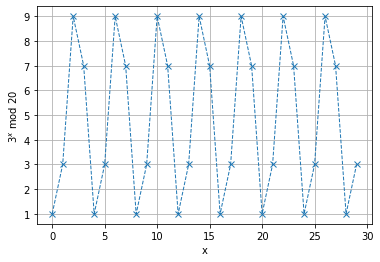

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(start=0, stop=29, num=30)
plt.plot(x, (3**x) % 20, 'x--', linewidth=1)
plt.xlabel('x', fontsize=10)
plt.ylabel('$3^x$ mod 20', fontsize=10)
plt.grid(b=True)
plt.show()

As you can see, this graph repeats itself after a couple of integers in the $x$ axis. This is what we are looking for. In this particular case, you can see that $r=4$, since the graph repeats every 4 integers. Also, note that $f(4)=3^4\: \text{mod}\: 20=81 \: \text{mod} \: 20 =1$. Let's see how to get the value of $r$ for any $a$ and $N$ with a quantum computer.

**Quantum Phase Estimation**

To get the period for equations of the form $f(x)=a^x\: \text{mod}\: N$, we will use quantum phase estimation. QPE estimates $\theta$ in $U |\psi\rangle = e^{2\pi i \theta} |\psi\rangle$ for a given unitary $U$. Without getting too much into detail, QPE uses an arbitrary number of counting qubits (on which the precision of the algorithm relies) in which we write the phase of $U$. The phase is written on the Fourier basis, thus we then use the inverse Quantum Fourier Transform to translate into the computational basis that we then measure. With this general idea of QPE, we can carry on with Shor's algorithm.

We will define $U$ from QPE as a unitary operator that performs the following operation:

$$ U |y \rangle = |ay \: \text{mod} \: N \rangle $$

Let's take the example we analyzed in the previous section, where $a=3$ and $N=20$. Each time we apply $U$, the initial state will get multiplied $a \: \text{mod} \: N$. Therefore, applying $U$ multiple times is equal to succesive multiplication and moreover equal to exponentiation. Therefore, considering $|1\rangle$ as the initial state and applying the $U$ operator $r$ (period) times will take us back to $|1\rangle$. Let's see this for our example.

$$
\begin{align}
U |1\rangle &= |3 \: \text{mod} \: 20 \rangle = |3\rangle \\
U |3\rangle &= |9 \: \text{mod} \: 20 \rangle = |9\rangle \\
U |9\rangle &= |27 \: \text{mod} \: 20 \rangle = |7\rangle \\
U |7\rangle &= |21 \: \text{mod} \: 20 \rangle = |1\rangle \\
\end{align}
$$

With this into account, we can see that a superposition of the above four states is an eigenstate of $U$. This may not be obvious at first, but let's see why it works. We define the eigenstate as 

$$
|\lambda_0\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}|a^k \: \text{mod} \: N\rangle.
$$

We divide by $\sqrt{r}$ because we want an equal superposition of the $r$ possible states. Then, the sum just produces each of these states. Continuing with our example, this eigenstate of $U$ would be 

$$
|\lambda_0\rangle = \frac{1}{2}\left(|1\rangle + |3\rangle + |9\rangle + |7\rangle \right).
$$

And why is this an eigenstate of $U$? Well, think about what happens when you apply $U$ to this gate. The first state turns into the second, the second into the third, the third into the fourth, and the fourth back to the first. Therefore, we can say that $|\lambda_0\rangle$ has an eigenvalue of 1. And this works for any $|\lambda_0\rangle$! But this state doesn't have any phase, so there's not much we can do with QPE in this case. Let's look at another eigenstate.

This time, the eigenstate we are going to look at has some phase information. We define it as 

$$
|\lambda_1\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{-\frac{2\pi i k}{r}} |a^k \: \text{mod} \: N\rangle.
$$

This time, it may be even more unclear how this is an eigenstate of $U$. Therefore, let's define $|\lambda_1\rangle$ for our particular example and then apply the operator to see what happens. 

$$
|\lambda_1\rangle = \frac{1}{2}\left(|1\rangle + e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle \right)
$$

Now we apply $U$.

$$
\begin{align}
U|\lambda_1\rangle &= \frac{1}{2}\left(|3\rangle + e^{-\frac{2 \pi i}{4}}|9\rangle + e^{-\frac{4 \pi i}{4}}|7\rangle + e^{-\frac{6 \pi i}{4}}|1\rangle \right) \\
&= e^{\frac{2 \pi i}{4}} \cdot \frac{1}{2} \left( e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle + e^{-\frac{8 \pi i}{4}}|1\rangle \right)
\end{align}
$$

And since $e^{-\frac{8 \pi i}{4}} = e^{-2 \pi i} = 1$,

$$
U|\lambda_1\rangle = e^{\frac{2 \pi i}{4}} |\lambda_1\rangle.
$$

This can be generalized as $U|\lambda_1\rangle=e^{\frac{2 \pi i}{r}}|\lambda_1\rangle$. Also, we can generalize this eigenstates to 

$$
|\lambda_s\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{-\frac{2\pi i s k}{r}} |a^k \: \text{mod} \: N\rangle,
$$

for some integer $0 \leq s \leq r - 1$. And its eigenvalue is $e^{\frac{2 \pi i s}{r}}$. Something important to note here is the following equality.

$$
\begin{align}
\frac{1}{\sqrt{r}} \sum_{s=0}^{r-1} |\lambda_s\rangle = &\frac{1}{2}(|\lambda_0\rangle + |\lambda_1\rangle + |\lambda_2\rangle + |\lambda_3\rangle) \\
= &\frac{1}{2}\Big( \frac{1}{2}(|1\rangle + |3\rangle + |9\rangle + |7\rangle) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle \right) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{4 \pi i}{4}}|3\rangle + e^{-\frac{8 \pi i}{4}}|9\rangle + e^{-\frac{12 \pi i}{4}}|7\rangle \right) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{6 \pi i}{4}}|3\rangle + e^{-\frac{12 \pi i}{4}}|9\rangle + e^{-\frac{18 \pi i}{4}}|7\rangle \right)\Big) = |1\rangle
\end{align}
$$

Now, here is where QPE comes in. We can estimate the phase of $U$ acting on $|1\rangle$, which will in turn be the phase of one of the $|\lambda_s\rangle$ eigenstates, although we don't know which one. Since QPE calculates $\theta$ in $e^{2 \pi i \theta}$ and our eigenvalues are of the form $e^{\frac{2 \pi i s}{r}}$, we will get $\frac{s}{r}$. Well, we actually get $2^n \frac{s}{r}$ (where $n$ is the number of qubits) from measuring because of the way QPE works, but we can just divide that measurement by $2^n$ and carry on. How do we get $r$ from this value?

**Continued fractions algorithm**

We need to use the continued fractions algorithm. It goes as follows. Suppose we have a real number $x$. And let $\lfloor x \rfloor$ denote the floor function. We define the starting values $a_0 = \lfloor x \rfloor$ and $x_0 = x$. Finally we define

$$
x_{i+1} = \frac{1}{x_i - a _i}, \hspace{0.3in} a_{i+1} = \lfloor x_{i+1} \rfloor.
$$

And the resulting continued fraction will take on the following form 

$$
x = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{a_3 + \cdots}}}.
$$

For example, the procedure above for an approximation of $\pi$ give us the following results. We are only going to show the few first values.

$$
\begin{align}
x_0 = \pi, &\hspace{0.3in} a_0 = 3 \\
x_1 = \frac{1}{\pi - 3} \approx 7.062513, &\hspace{0.3in} a_1 = 7 \\
x_2 = \frac{1}{0.062513} \approx 15.996594, &\hspace{0.3in} a_2 = 15 \\
x_3 = \frac{1}{0.996594} \approx 1.003417, &\hspace{0.3in} a_3 = 1
\end{align}
$$

And using these first few values we see that the continued fraction for $\pi$ starts as

$$
\pi = 3 + \cfrac{1}{7 + \cfrac{1}{15 + \cfrac{1}{1 + \cdots}}}
$$

Which in turn gives us the following approximations: $3, \frac{22}{7}, \frac{333}{106}, \frac{355}{113}$. Well, that's the algorithm. Now, let's see how we use it to extract $r$ from $\frac{s}{r}$. 

Once we get $\frac{s}{r}$ from Shor's, we will use the above algorithm to express it as a continued fraction. When we have this expression, we go ahead and get the approximations as we did for $\pi$ in the first sentence of the last paragraph. And from the denominators of these fractions, we choose the one that is closer to $N$ but still less than it (because the period must be less than $N$).

Let's do a quick example. Suppose we have $N=15$ and get $110$ as output from our quantum algorithm. These as decimal is equal to $6$. Now, don't forget that we need to divide this value by $2^n$ because of the inner works of QPE. Since we have $3$ qubits, we divide by $8$ and get $0.75$. This is easy to express as a continued fraction; it is the following.

$$
0.75 = \cfrac{1}{1 + \cfrac{1}{3}}
$$

The approximations we get from this are: $0, \frac{1}{1}, \frac{3}{4}$. Looking at the denominators, we see that the greatest one that is still less than $N$ is $4$. Therefore, that will be our guess for $r$, the period. This was a **really** easy example, but the steps are the same for any output.

**Classical part**

Great, we have covered the quantum routine used in Shor's algorithm. Now, let's see how to use this routine along with classical calculations to factor $N$. 

The first thing we are going to do is choose a random number $1 < a < N$. Using Euclid's algorithm, calculate $\gcd(a, N)$. Now, if $\gcd(a, N) \not= 1$, then $\gcd(a, N)$ is a factor of $N$ and we have factored $N$ without using our quantum routine.

If $\gcd(a, N) = 1$, we use our quantum routine to find the period of $f(x) = a^x \: \text{mod} \: N$. However, if $r$ turns out to be odd, we need to pick a new $a$ and repeat the steps above. Also, if $a^{r/2} \equiv -1 \: \text{mod} \: N$, we also need to pick a new $a$ and start over. 

Once the two conditions above have been met, we have found non-trivial factors of $N$. These are: $\gcd(a^{r/2}+1, N)$ and $\gcd(a^{r/2}-1, N)$; which can be calculated using Euclid's algorithm again. 

**Qiskit implementation**

With all the knowledge we have, let's look at an actual circuit for Shor's algorithm. We will be using Qiskit's implementation of the algorithm and then we will analyze the resulting circuit. Let's look at a circuit for $N=3$. The answer to this is trivial, but the resulting circuit is relatively small and will help us analyze it.

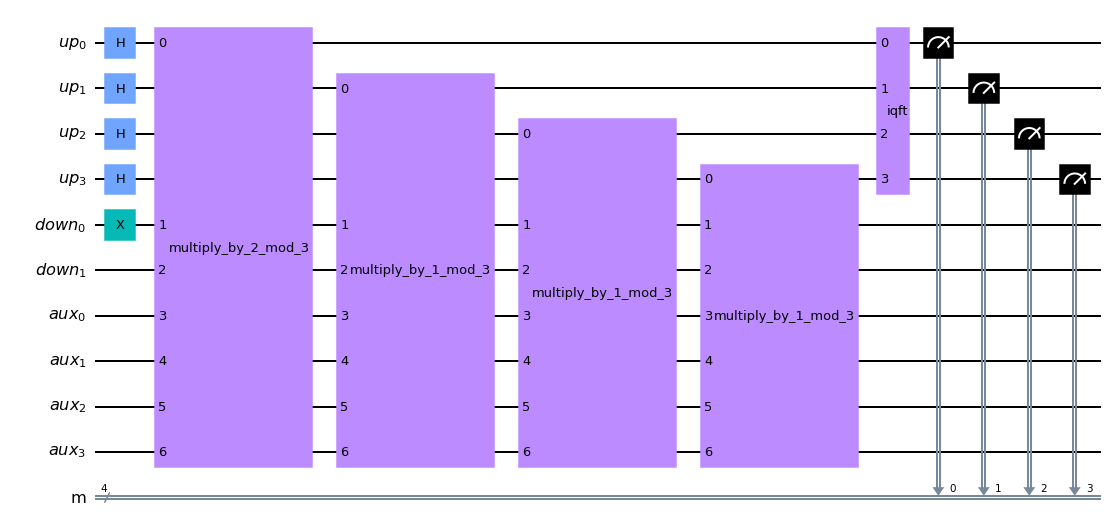

In [25]:
from qiskit.algorithms import Shor
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')

shors = Shor(backend)
qc = shors.construct_circuit(N=3, measurement=True)
qc.draw('mpl')

As you can see, the first column of gates prepares the qubit registers to the needed initial state. Then, the following 4 gates apply the controlled $U^{2^j}$ gates needed for QPE. As you can see, each of this gates uses one qubit from the `up` register (denoted by the 0 in the top left of each gate) and all the qubits from the `down` and `aux` registers. This is because the operator is controlled by the qubit from the `up` register, acts on the `down` register and uses the `aux` register as ancilla. Then, an inverse Quantum Fourier Transform is applied to the `up` register to translate the phase from the Fourier basis to the computational basis. Finally, we just measure the `up` register. 

Now, let's see if we get the expected result by calling the `.factor()` method. This will do all the classical processing that we described earlier and give us the final factors.

In [26]:
shors.factor(N=3).factors

[]

Well, no surprise there since we already know that 3 is prime. Now that you see how this works, let's see the circuit when trying to factor 15.

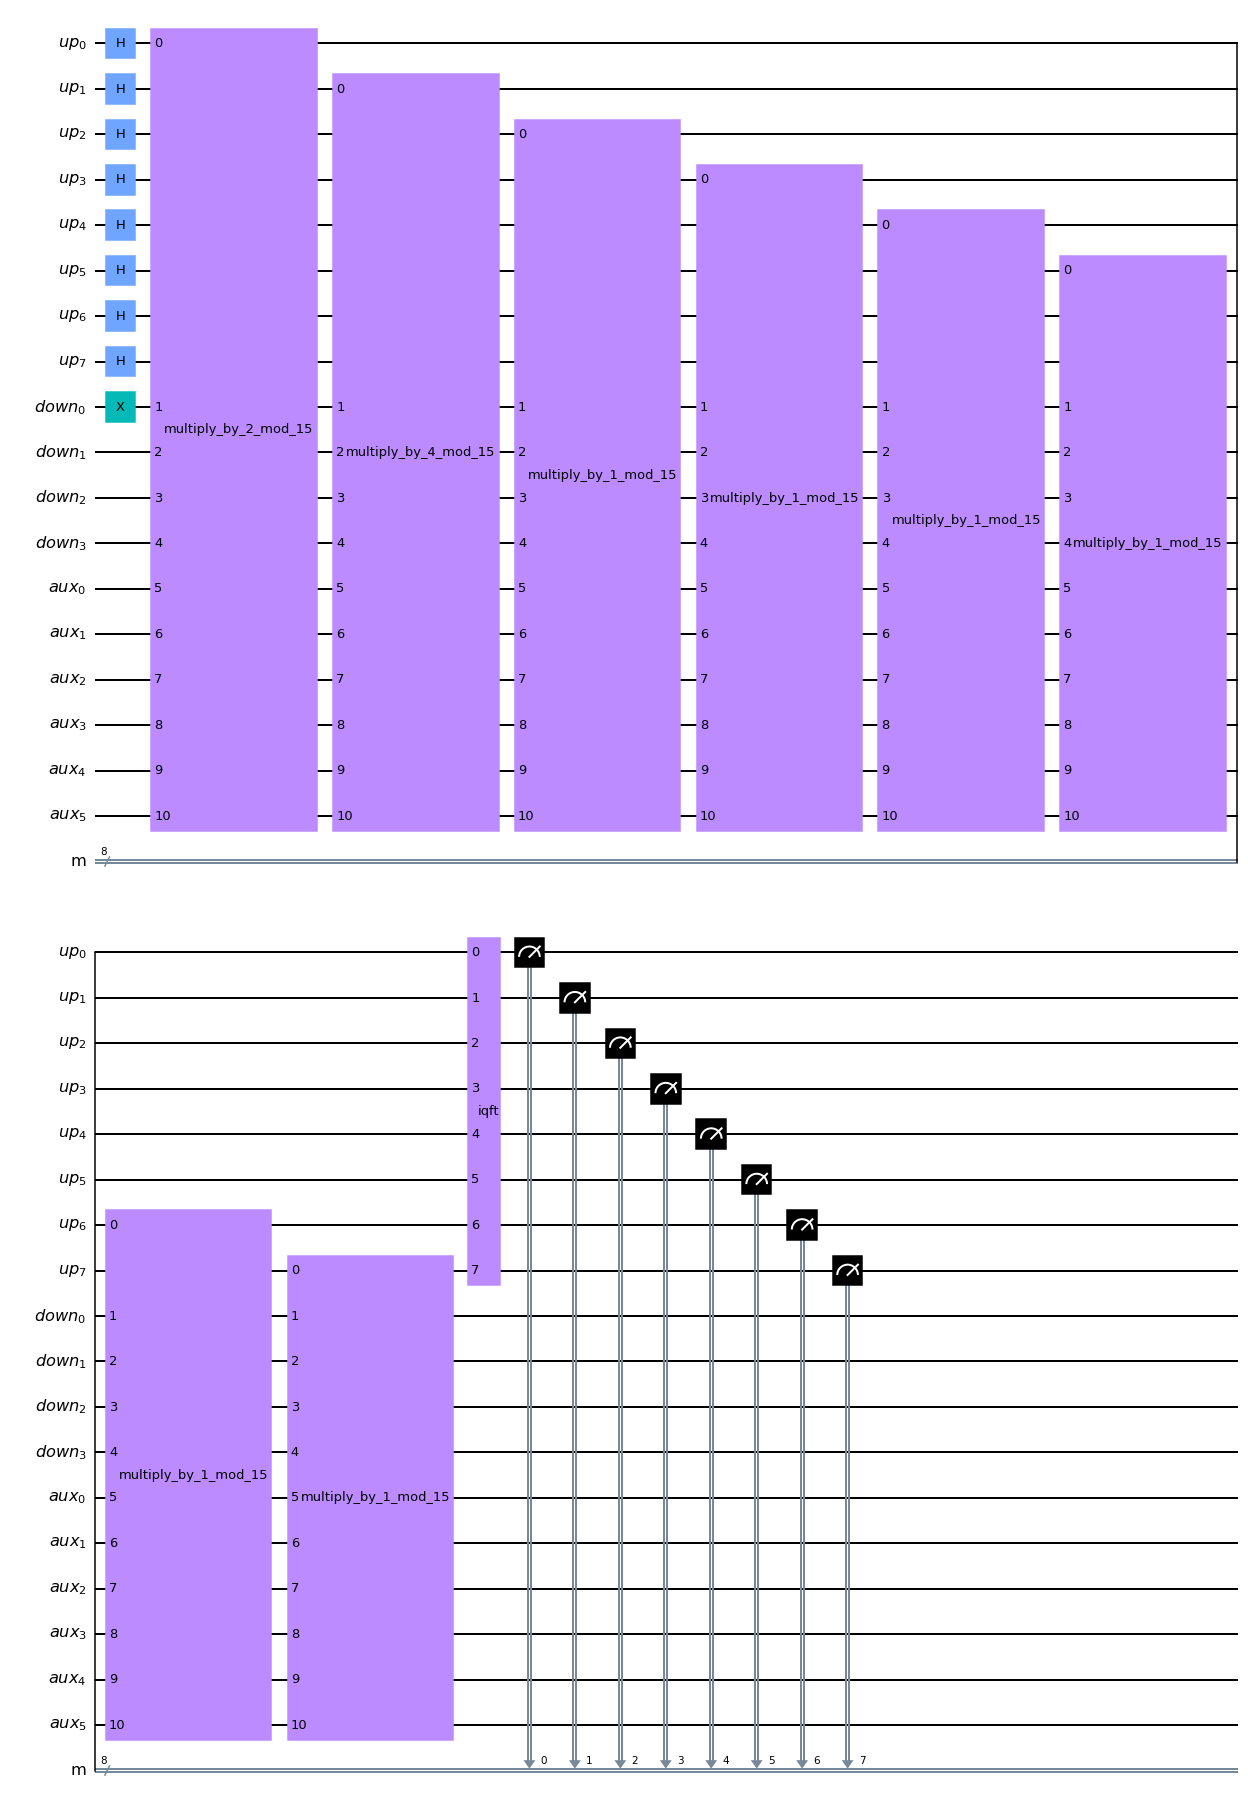

In [27]:
qc = shors.construct_circuit(N=15, measurement=True)
qc.draw('mpl')

The circuit is way bigger now. We have 8 qubits in the `up` register rather than 4. This is because the more qubits, the more precision QPE can give us. And since we are dealing with 15 rather than 3 now, we want more precision when getting the period of $a^x \: \text{mod} \: 15$. The other registers also have more qubits now. This is because more qubits are needed to implement the $U^{2^j}$ operators. Finally, let's see if this works.

In [33]:
shors.factor(N=15).factors

[[3, 5]]

And yes, we get 5 and 3! Now, let's try factoring 35. I won't draw the circuit because it's too large, but I'll print the number of qubits, the number of gates and the depth so you can get an idea of how big it is. 

In [35]:
qc = shors.construct_circuit(N=35, measurement=True)
print('Number of qubits:', qc.num_qubits, '\nGate operations:', qc.size(), '\nDepth:', qc.depth())

shors.factor(N=35).factors

Number of qubits: 26 
Gate operations: 38 
Depth: 15


[[5, 7]]

As you can see, the resulting circuit is quite big. But we get the correct factors: 5 and 7!

**References**
- [1] https://arxiv.org/abs/quant-ph/9508027
- [2] https://qiskit.org/textbook/ch-algorithms/shor.html
- [3] http://www.math.umd.edu/~lcw/three68.pdf
- [4] https://en.wikipedia.org/wiki/Shor%27s_algorithm